# 1 - Introduction 

In this Data Analytics work, we will explore the power of hypothesis testing, a fundamental technique of inferential statistics that allows us to make inferences about a population based on a sample of data. Hypothesis tests provide a structured framework for assessing the validity of claims about population parameters such as means, proportions, and variances. Throughout the analysis, we will delve into different types of hypothesis tests, such as the Z-test, t-test, ANOVA, and chi-square test, and discuss their applications in various scenarios. Over the course of this work, we will emphasize the importance of understanding hypothesis tests and their role in data analysis for the advancement of knowledge.

We will apply the hypothesis tests in 4 databases, for each database we will contextualize and include the conclusion of the test performed








# 2 - Task 1 - Exam score

We will explore the data and perform hypothesis testing using the dataset "Q1," which contains the scores (in percentages) of a sample of 50 students from a secondary school in Dublin. The purpose of the hypothesis test is to assess whether the performance of students in this school is below the national average, which is 70%

# Import Libraries 


Importing the libraries that will be used during the project development

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.image as plt
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import statistics

# 2.1 - Loading the file

In [3]:
df=pd.read_csv("Q1.csv")

# 2.2 - Characterisation of the data set

I will perform data characterization in Python to understand the essential characteristics of the data, such as examining the dimensions of the dataset, identifying types of variables present, exploring statistics, among others. The analyses conducted will be detailed below.

In [4]:
df.head ()

,exam_score
0,74.54
1,66.20
2,86.75
3,70.87
4,80.43


In [5]:
df.shape

(50, 1)

This database contains only one column with 50 rows

In [6]:
df.describe ()

,exam_score
count,50.000000
mean,68.735600
std,9.750143
min,48.730000
25%,62.040000
50%,68.390000
75%,74.630000
max,87.360000



The students' grades have an average of 68.73 with a standard deviation of 9.75.

In [7]:
df.mean()

exam_score    68.7356
dtype: float64

In [8]:
df.median()

exam_score    68.39
dtype: float64

# 2.3 - Data Exploration 

C:\Users\Ana Paula Damasceno\AppData\Local\Temp\ipykernel_14704\751998997.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['exam_score'], shade=True)


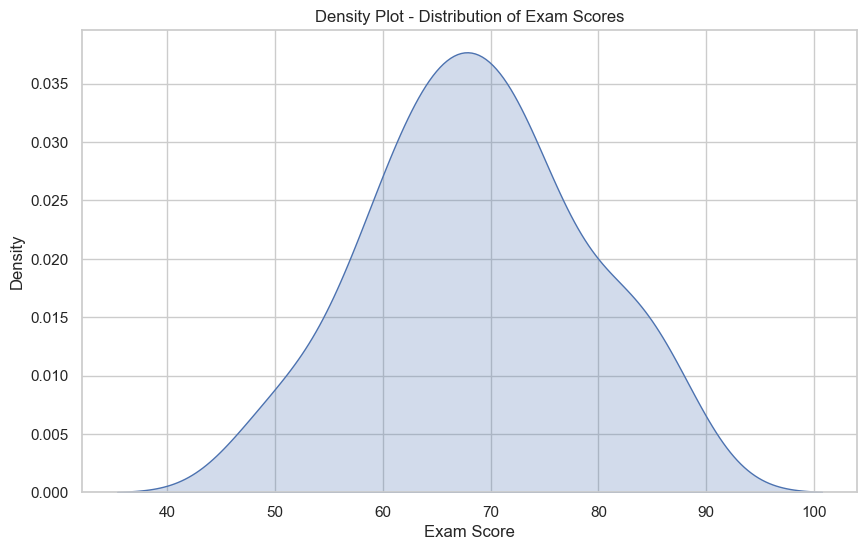

In [9]:
# Setting the style of the plot
sns.set(style="whitegrid")

# Creating the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['exam_score'], shade=True)
plt.title('Density Plot - Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Density')
plt.show()

Through the density plot, what we can observe is:

Grade Concentration: We can see that the majority of grades are concentrated around a specific range, indicated by the highest region of the density curve.

Symmetrical Distribution: The density curve appears to follow a symmetrical distribution, suggesting that most students achieved median grades.

Extreme Grades: However, we also notice a longer tail towards higher grades, indicating that some students performed exceptionally well.

Grade Variation: The density of grades gradually decreases as we move away from the central range, indicating a variation in the distribution of grades.

Therefore, based on this data, we can conclude that most students achieved median grades, but there were also cases of exceptional performance both upwards and downwards.

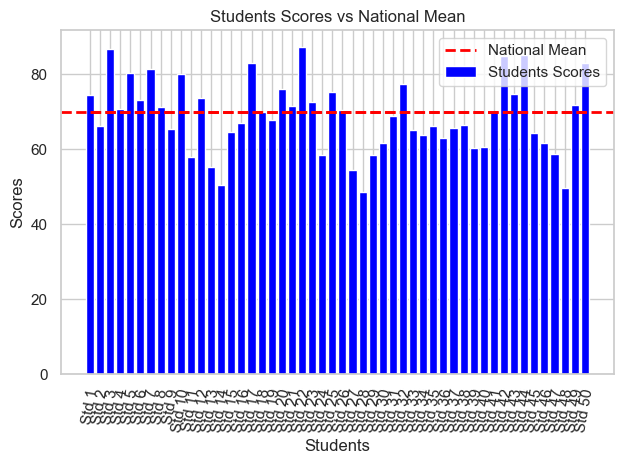

In [10]:
# Sample mean
sample_mean = df['exam_score'].mean()

# Define the national mean
national_mean = 70

# Create a list of labels for the students
students = ['Std {}'.format(i+1) for i in range(len(df))]

# Create a list of students' scores
students_scores = df['exam_score']

# Create a list with the national mean repeated for each student
national_scores = [national_mean] * len(df)

# Create the bar chart
plt.bar(students, students_scores, color='blue', label='Students Scores')
plt.plot(students, national_scores, color='red', linestyle='dashed', linewidth=2, label='National Mean')

# Add a horizontal line for the national mean
plt.axhline(y=national_mean, color='red', linestyle='dashed', linewidth=2)

# Add legends and axis labels
plt.xlabel('Students')
plt.ylabel('Scores')
plt.title('Students Scores vs National Mean')
plt.legend()

# Display the plot
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()



The bar chart displays the individual scores of students in an exam, represented by blue bars, along with the national average of 70.000, highlighted by a dashed red line. Some bars are above the line, indicating scores higher than the national average, while others are below, suggesting lower scores.

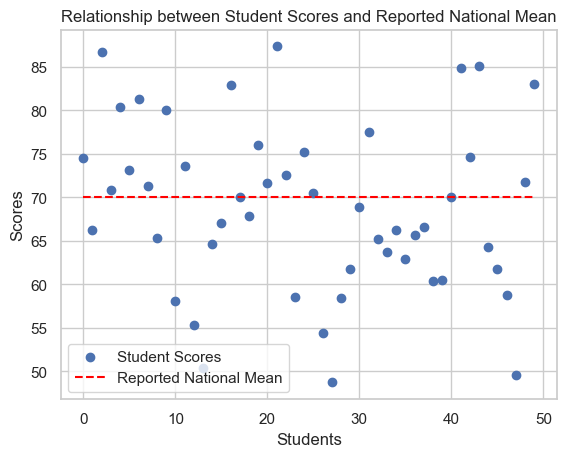

In [11]:
import matplotlib.pyplot as plt

# Student exam scores and reported national mean
student_scores_school = df['exam_score']
reported_national_mean = 70

# Create scatter plot
plt.scatter(range(len(student_scores_school)), student_scores_school, label='Student Scores')
plt.plot(range(len(student_scores_school)), [reported_national_mean]*len(student_scores_school), 
         color='red', linestyle='--', label='Reported National Mean')

# Add title and axis labels
plt.title('Relationship between Student Scores and Reported National Mean')
plt.xlabel('Students')
plt.ylabel('Scores')
plt.legend()
plt.show()


This scatter plot illustrates the relationship between student scores and the reported national mean. Each point represents the score of a student, with the horizontal axis indicating the students and the vertical axis indicating their scores. The dashed red line denotes the reported national mean, which is 70 in this case.

Observing the scatter plot, we notice that some student scores are above the reported national mean, while others are below. This suggests variations in individual performance compared to the reported average. Points above the dashed line represent students who scored higher than the reported national mean, while points below the line represent those with scores lower than the reported average.

# 2.4 Outliers

<Axes: xlabel='exam_score'>

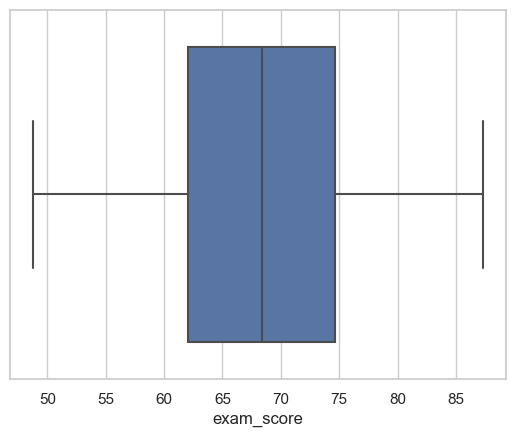

In [12]:
sns.boxplot(x=df["exam_score"])

No outliers to assess for removal

# 2.5 - Hypothesis Testing

Contextualizing the problem: We are working with a dataset containing a sample of student performance (50 students) from a school in Dublin. Considering this context, one of the teachers is concerned about the students' performance at the school. She suspects that their performance may be below the reported national average of 70%. The purpose of this hypothesis test will be to assess whether the teacher's concerns are justified. To conduct the test, we will use:

Significance level alpha = 0.05

Sample mean = mean of the school's students

Population mean = national average student mean

Para realizar o teste de hipotese para identificar se a media dos alunos da escola de Dublin esta abaixo da media nacional, iremos usar o one sample test. 

One Sample Test: The one-sample hypothesis test is a statistical technique used to determine whether the mean of a sample is statistically different from a known reference value. It involves formulating a null hypothesis (H0) and an alternative hypothesis (H1), where the null states that there is no difference, while the alternative suggests otherwise. An appropriate test statistic, such as the Student's t-test, is calculated along with a p-value, indicating the probability of obtaining the observed results if the null hypothesis is true. If the p-value is less than a predetermined significance level (0.05), the null hypothesis is rejected, concluding that there is a statistically significant difference. Otherwise, there is insufficient evidence to reject the null hypothesis.



In [13]:
from scipy import stats 

# The one sample t-test model is ttest_1samp which takes in the sample mean 
stats.ttest_1samp(df['exam_score'], popmean = 70)

TtestResult(statistic=-0.9169771399834613, pvalue=0.36364597032062806, df=49)

In [14]:
import math
from scipy import stats

# Performing the t-test using scipy.stats:
scipy_result = stats.ttest_1samp(df['exam_score'], popmean=70)  # popmean changed to 70
print("Result of t-test using scipy.stats:", scipy_result)

# Manually calculating the test statistic:
xbar = df['exam_score'].mean()  # Sample mean
mu = 70  # Updated expected mean to 70
s = statistics.stdev(df['exam_score'])  # Sample standard deviation
n = len(df['exam_score'])  # Sample size

test_statistic = (xbar - mu) / (s / math.sqrt(n))
print("Test Statistic (Manual Calculation):", test_statistic)


Result of t-test using scipy.stats: TtestResult(statistic=-0.9169771399834613, pvalue=0.36364597032062806, df=49)
Test Statistic (Manual Calculation): -0.9169771399834615


In [15]:
sample_mean = df['exam_score'].mean()

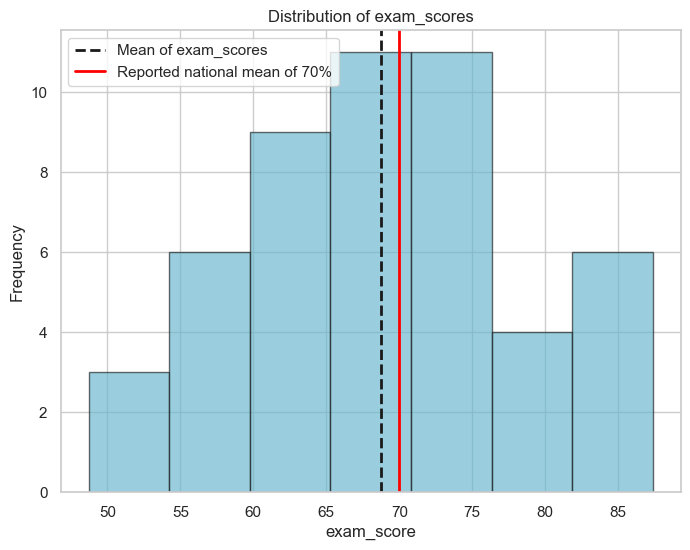

NameError: name 'resultado_scipy' is not defined

In [16]:


# Mean of exam_scores
media_exam_scores = df['exam_score'].mean()

# Create the plot
plt.figure(figsize=(8, 6))
result = plt.hist(df['exam_score'], bins=7, color="c", edgecolor="k", alpha=0.65)

# Add line for the mean of exam_scores
plt.axvline(media_exam_scores, color="k", linestyle="dashed", linewidth=2, label="Mean of exam_scores")

# Add line for the reported national mean of 70%
plt.axvline(70, color="red", linestyle="solid", linewidth=2, label="Reported national mean of 70%")

plt.title('Distribution of exam_scores')
plt.xlabel('exam_score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Display the result of the t-test
print("Result of t-test using scipy.stats:", resultado_scipy)

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Defining parameters
alpha = 0.05
alternative = 'two-sided'

# Population parameters
population_mean = 70  # Reported national mean

# Sample statistics (assuming 'df' is the DataFrame with the data)
sample = df['exam_score']
n = len(sample)
sample_mean = sample.mean()
sample_std = sample.std()

# Statistical test results
test_statistic = -0.9169771399834613
p_value = 0.36364597032062806

# Function to conclude and visualize the results
def conclusion_and_visualization(title, test_stat, p_val, alpha, alternative):
    # Calculating the critical value
    if alternative == 'two-sided':
        critical_value = stats.norm.ppf(1 - alpha/2)
    elif alternative == 'lower':
        critical_value = stats.norm.ppf(alpha)
    elif alternative == 'upper':
        critical_value = stats.norm.ppf(1 - alpha)
    
    # Plotting the standard normal distribution
    fig, ax = plt.subplots()
    x = np.linspace(-4, 4, 1000)
    ax.plot(x, stats.norm.pdf(x), label='Standard Normal Distribution', color='blue')
    
    # Highlighting the rejection area
    ax.fill_between(x, 0, stats.norm.pdf(x), where=(x <= -critical_value), color='red', alpha=0.3)
    ax.fill_between(x, 0, stats.norm.pdf(x), where=(x >= critical_value), color='red', alpha=0.3)
    
    # Plotting the point of the test statistic
    ax.scatter(test_stat, 0, color='black', zorder=5)
    ax.annotate(f'Test Statistic = {test_stat:.2f}', (test_stat, 0.01), xytext=(test_stat - 1, 0.2), 
                arrowprops=dict(facecolor='black', arrowstyle='->'))
    
    # Lines for the critical value
    ax.axvline(-critical_value, linestyle='--', color='green', label=f'Critical Value ({alpha/2})')
    ax.axvline(critical_value, linestyle='--', color='green')
    
    # Displaying the p-value on the plot
    ax.text(-2, 0.3, f'p-value = {p_val:.5f}', fontsize=12, color='black')
    
    # Additional plot settings
    ax.set_title(title)
    ax.legend(loc='upper right')
    
    plt.show()

# Calling the function to conclude and visualize the results
conclusion_and_visualization(
    title='One Sample T-test',
    test_stat=test_statistic,
    p_val=p_value,
    alpha=alpha,
    alternative=alternative
)


# 2.6 Conclusion Hyphotesis test 

Based on the statistical analysis conducted, there is insufficient evidence to reject the null hypothesis that the students' performance in the school does not differ significantly from the reported national average of 70%. Using a significance level of 0.05, the obtained p-value was 0.364, indicating that there is no statistically significant difference between the students' performance and the national average.

Furthermore, considering the school's average as 68, the result of the hypothesis test suggests that the students' performance is not statistically different from this local average. Therefore, with a confidence level of 95%, we can conclude that the students' performance appears to be in line with the local average.



# 3 - Task 2 - Diamonds


In Task 2, we will analyze the relationship between the clarity of diamonds and whether they are considered colorless or not. Here's a breakdown of what needs to be done:

a. Creating a binary variable: We will create a new binary variable in the dataset called "colourless" which will have a value of 1 for rows with colorless diamonds (those with color grades from "D" to "F") and 0 for rows with diamonds that are not colorless (grades from "G" to "J").

b. Hypothesis test: We will perform a suitable hypothesis test to determine whether there is an association between the clarity of a diamond and whether it is considered colorless or not. We'll use a significance level (alpha) of 0.01.

c. Plotting the findings: We'll produce a plot to visually illustrate the relationship between diamond clarity and colorlessness.

d. Confidence intervals: We'll find and interpret 90% confidence intervals for both the mean price of colorless diamonds and the mean price of non-colorless diamonds. This will give us insight into the range of likely values for the average price of each category of diamonds.

Overall, this analysis will help us understand if there is a significant relationship between diamond clarity and colorlessness, and how it may relate to diamond prices.

# 3.1 - Loading the file

In [20]:
dfd=pd.read_csv("diamonds.csv")

# 3.2 - Characterisation of the data set

In [21]:
dfd.head ()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [22]:
dfd.shape

(53940, 10)

The dataset contains 53940 rows and 10 columns

In [23]:
dfd.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [24]:
dfd.describe ()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


These statistics provide a summary of the distribution and central tendency of the variables in the dataset:

carat: The average carat weight of diamonds is approximately 0.798, with a standard deviation of around 0.474. The range of carat weights extends from a minimum of 0.2 to a maximum of 5.01.

depth: The average depth percentage of diamonds is approximately 61.75%, with a standard deviation of around 1.43. The depth values range from a minimum of 43 to a maximum of 79.

table: The average table percentage of diamonds is approximately 57.46%, with a standard deviation of around 2.23. Table values range from a minimum of 43 to a maximum of 95.

price: The average price of diamonds is approximately $3932.80, 
with stand deviation around $3989.44. Prices vary widely, from a minimum of $326 to a maximum of $18823.

x, y, z: These represent the dimensions of diamonds in length, width, and depth, respectively. The averages are approximately 5.73, 5.73, and 3.54, with corresponding standard deviations of approximately 1.12, 1.14, and 0.71. The range of values for each dimension varies widely, with some extreme values observed, especially for "z", which ranges from 0 to 31.8.

In [25]:
dfd.describe(include="object")

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [26]:
dfd.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

No missing values were identified in the dataset

Creating a binary variable: We will create a new binary variable in the dataset called "colourless" which will have a value of 1 for rows with colorless diamonds (those with color grades from "D" to "F") and 0 for rows with diamonds that are not colorless (grades from "G" to "J").

In [27]:
dfd['colorless'] = dfd['color'].apply(lambda x: 1 if x in ['D', 'E', 'F'] else 0)

Visualizing the Data After Creating the New Variable

In [28]:
dfd.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,colorless
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0


In [29]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53940 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53940 non-null  object 
 3   clarity    53940 non-null  object 
 4   depth      53940 non-null  float64
 5   table      53940 non-null  float64
 6   price      53940 non-null  int64  
 7   x          53940 non-null  float64
 8   y          53940 non-null  float64
 9   z          53940 non-null  float64
 10  colorless  53940 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [30]:
dfd.isnull().sum().sum()

0

No missing values after change

# 3.3 - Data Exploration

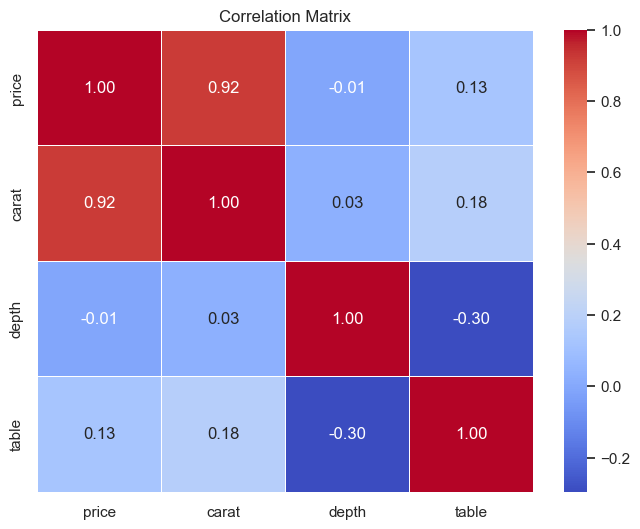

In [31]:
import seaborn as sns

# Select the numerical variables
numeric_variables = dfd[['price', 'carat', 'depth', 'table']]

# Calculate the correlation coefficients
correlation_matrix = numeric_variables.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


The correlation matrix reveals linear relationships among numerical variables in a dataset. In the context of diamonds, the analysis unveiled:

A strong positive correlation between price and carat weight of diamonds, suggesting that price tends to increase with increasing weight.
Weak correlations between price and depth, as well as between price and table width of diamonds. This implies that these characteristics have minimal influence on price.
A moderate negative correlation between depth and table width, indicating an inverse relationship between these two characteristics.
These findings aid in understanding how different characteristics of diamonds relate to their prices.

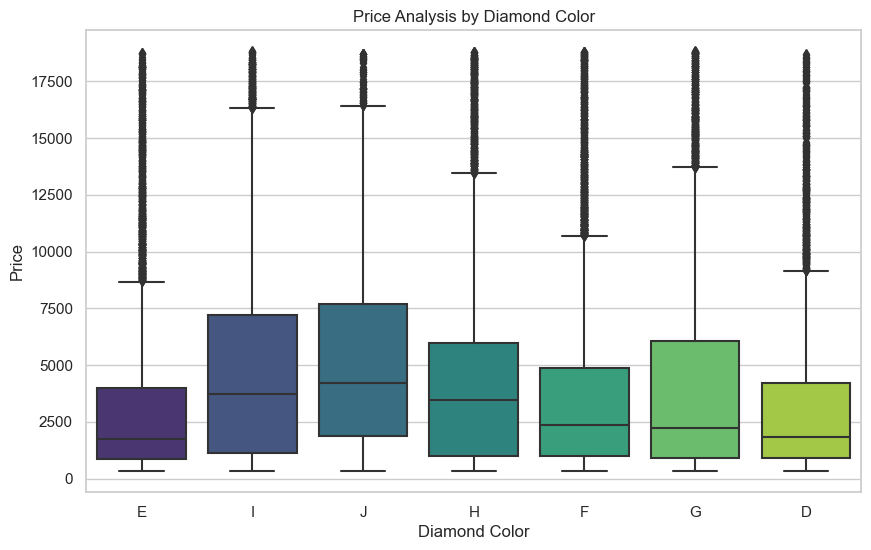

In [32]:
import seaborn as sns

# Create a boxplot to compare the average prices of diamonds by color
plt.figure(figsize=(10, 6))
sns.boxplot(x='color', y='price', data=dfd, palette='viridis')
plt.title('Price Analysis by Diamond Color')
plt.xlabel('Diamond Color')
plt.ylabel('Price')
plt.show()


The graph shows us the frequency of colors and the correlation with the price of diamonds

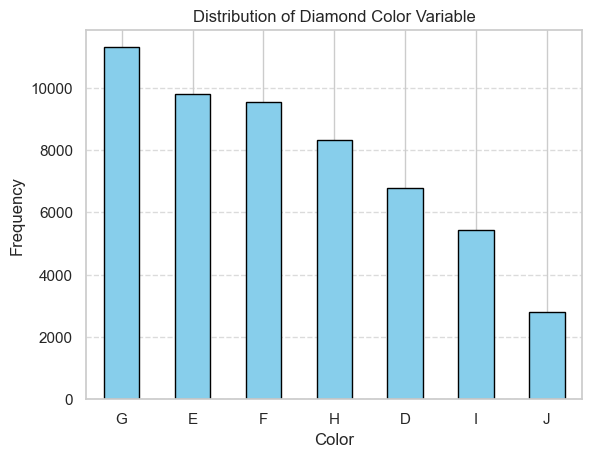

In [33]:
import matplotlib.pyplot as plt

# Analyze the distribution of the diamond color variable
cor_counts = dfd['color'].value_counts()

# Visualize the distribution using a bar plot
cor_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Diamond Color Variable')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Adjust the rotation of the x-axis label
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In the graph above, we can see that the G-colored diamond is the one with the highest volume in the sample

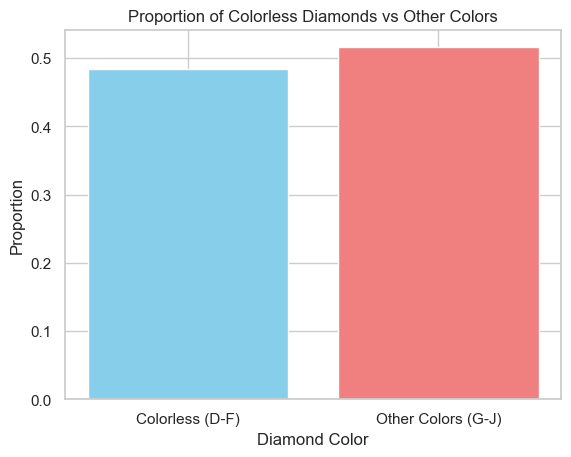

In [34]:
import matplotlib.pyplot as plt

# Calculate the proportion of colorless diamonds (D to F) and diamonds of other colors (G to J)
colorless_count = dfd[dfd['color'].isin(['D', 'E', 'F'])]['color'].count()
other_color_count = dfd[dfd['color'].isin(['G', 'H', 'I', 'J'])]['color'].count()

total_count = len(dfd)

# Calculate proportions
colorless_proportion = colorless_count / total_count
other_color_proportion = other_color_count / total_count

# Create a bar plot
labels = ['Colorless (D-F)', 'Other Colors (G-J)']
proportions = [colorless_proportion, other_color_proportion]
colors = ['skyblue', 'lightcoral']

plt.bar(labels, proportions, color=colors)
plt.title('Proportion of Colorless Diamonds vs Other Colors')
plt.xlabel('Diamond Color')
plt.ylabel('Proportion')
plt.show()


The chart shows the ratio of colorless diamonds (D to F) compared to diamonds of other colors (G to J). In this case, we can identify that diamonds of other colors have a higher proportion

# 3.4 - Outliers 

<Axes: xlabel='colorless'>

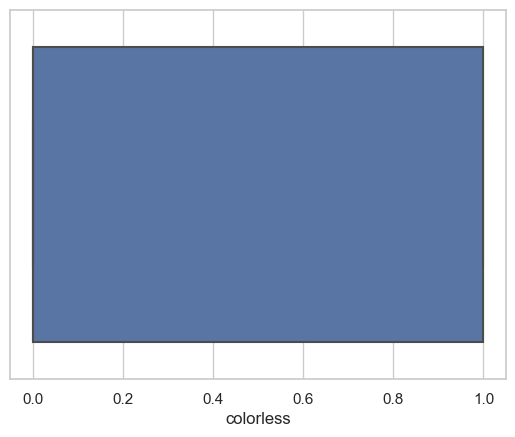

In [35]:
sns.boxplot(x=dfd["colorless"])

No outliers to assess for removal

# 3.5 - Hypothesis Testing

Contextualizing the hypothesis test: The objective of the hypothesis test conducted below is to examine whether there is a significant association between the clarity of a diamond and whether it is colorless or not. We will utilize a significance level (alpha) of 0.01 to determine the statistical significance of any observed associations.

The chosen hypothesis test: To evaluate the association between diamond clarity and color, we will use the Chi-square test of independence. 

Chi-square test: This test assesses whether there is a significant association between two categorical variables, in this case, clarity and color. It calculates the expected frequencies for each combination of categories under the assumption of independence and compares them to the observed frequencies in the dataset. If the difference between the expected and observed frequencies is large enough, the null hypothesis of independence is rejected, indicating that there is a significant association between the variables.



In [36]:
from scipy.stats import chi2_contingency

# Create a contingency table between the variable "colourless" and the variable "clarity"
contingency_table = pd.crosstab(dfd['clarity'], dfd['colorless'])

# Perform the chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 486.47305941485223
p-value: 6.481587124454715e-101


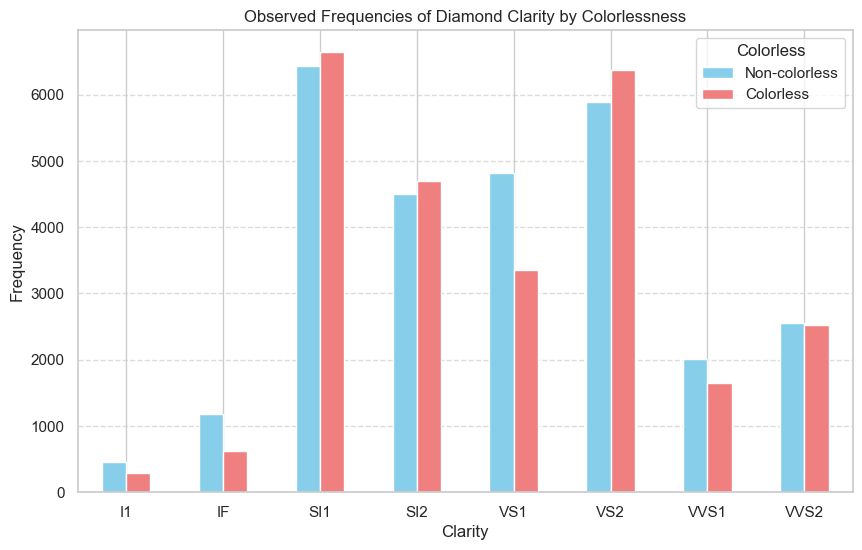

In [37]:
import matplotlib.pyplot as plt

# Plot the observed frequencies for each clarity category
contingency_table.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightcoral'])

# Add labels and title
plt.title('Observed Frequencies of Diamond Clarity by Colorlessness')
plt.xlabel('Clarity')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Adjust the rotation of the x-axis label

# Show the plot
plt.legend(title='Colorless', labels=['Non-colorless', 'Colorless'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


 Find and interpret 90% confidence intervals:

In [38]:
import scipy.stats as stats

# 90% confidence interval for the mean price of colorless diamonds
colorless_prices = dfd[dfd['colorless'] == 1]['price']
ci_colorless = stats.t.interval(0.90, len(colorless_prices)-1, loc=colorless_prices.mean(), scale=stats.sem(colorless_prices))
print("90% confidence interval for mean price of colorless diamonds:", ci_colorless)

# 90% confidence interval for the mean price of non-colorless diamonds
non_colorless_prices = dfd[dfd['colorless'] == 0]['price']
ci_non_colorless = stats.t.interval(0.90, len(non_colorless_prices)-1, loc=non_colorless_prices.mean(), scale=stats.sem(non_colorless_prices))
print("90% confidence interval for mean price of non-colorless diamonds:", ci_non_colorless)


90% confidence interval for mean price of colorless diamonds: (3301.857515879007, 3373.661286296071)
90% confidence interval for mean price of non-colorless diamonds: (4448.778068284649, 4533.682076903305)


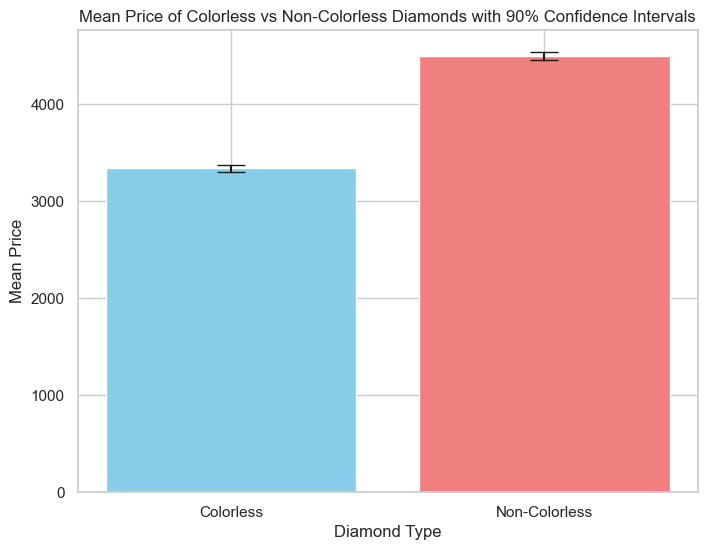

In [39]:
import matplotlib.pyplot as plt

# Define the data
categories = ['Colorless', 'Non-Colorless']
means = [3337.76, 4491.23]  # Mean prices
errors = [(3373.66 - 3301.86) / 2, (4533.68 - 4448.78) / 2]  # Half of the confidence interval for each category

# Create the bar chart with confidence intervals
plt.figure(figsize=(8, 6))
plt.bar(categories, means, yerr=errors, capsize=10, color=['skyblue', 'lightcoral'])
plt.title('Mean Price of Colorless vs Non-Colorless Diamonds with 90% Confidence Intervals')
plt.xlabel('Diamond Type')
plt.ylabel('Mean Price')
plt.show()


# 3.6 - Conclusion Hyphotesis test

The chi-square test results reveal a chi-square statistic of approximately 486.47, with a p-value very close to zero. These findings provide strong statistical evidence to reject the null hypothesis of independence between diamond clarity and color. Essentially, this means that diamond clarity and color are significantly associated. With such a minuscule p-value, practically insignificant compared to the significance level of 0.01, it suggests that the probability of observing such a strong association between clarity and color of diamonds by chance is extremely low, nearly negligible. Thus, we can have high confidence that the association between these variables is genuine and not due to random fluctuations. Consequently, the results indicate that diamond clarity and color are correlated in some way in the analyzed dataset.

The results provide 90% confidence intervals for the mean price of both colorless and non-colorless diamonds. These intervals represent ranges where the true average price of diamonds is likely to fall, with a 90% level of confidence. For colorless diamonds, the interval ranges approximately from $3301.86 to $3373.66, meaning we can be 90% confident that the actual average price of colorless diamonds lies within this range. Similarly, for non-colorless diamonds, the interval ranges approximately from $4448.78  to $4533.68, indicating we can be 90% confident that the actual average price of non-colorless diamonds lies within this interval. In summary, these intervals provide an estimate of the mean price of diamonds with a high degree of confidence, helping to better understand the range of values within which these diamonds can be traded.

# 4 Task 3 - PlantGrowth

In task 3, we will analyze the PlantGrowth dataset from the pydataset library. This dataset examines plant yields under a control condition and two different treatments. We will analyze descriptive statistics, conduct data exploration, and perform hypothesis testing to assess if there is a significant difference between the means of the three groups.


a. Find and comment on important summary statistics by treatment and produce an 
appropriate plot to summarise the dataset.

b. Conduct an appropriate hypothesis test to see if there is evidence of a difference between 
the three means (that is, the control and the two treatments). Use a significance level of 
alpha = 0.05. 

c. If there is evidence of a difference between the three means, find and comment on where 
this difference may be.











In [40]:
pip install pydataset

Note: you may need to restart the kernel to use updated packages.


# 4.1 Loading the file

In [41]:
from pydataset import data 
df_plant = data("PlantGrowth")


# 4.2 - Characterisation of the data set

In [42]:
df_plant.head ()

,weight,group
1,4.17,ctrl
2,5.58,ctrl
3,5.18,ctrl
4,6.11,ctrl
5,4.50,ctrl


In [43]:
df_plant.shape 

(30, 2)

In [44]:
df_plant.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   weight  30 non-null     float64
 1   group   30 non-null     object 
dtypes: float64(1), object(1)
memory usage: 720.0+ bytes


In [45]:
df_plant.describe ()

,weight
count,30.000000
mean,5.073000
std,0.701192
min,3.590000
25%,4.550000
50%,5.155000
75%,5.530000
max,6.310000


In [46]:
# Calculate descriptive statistics for the weight of plants in each group
summary_stats = df_plant.groupby('group')['weight'].describe()

# Display the result
print(summary_stats)


       count   mean       std   min     25%    50%     75%   max
group                                                           
ctrl    10.0  5.032  0.583091  4.17  4.5500  5.155  5.2925  6.11
trt1    10.0  4.661  0.793676  3.59  4.2075  4.550  4.8700  6.03
trt2    10.0  5.526  0.442573  4.92  5.2675  5.435  5.7350  6.31


Grupo Controle (ctrl):
Média: Aproximadamente 5.03 and
desvio Padrão: Aproximadamente 0.58

Tratamento 1 (trt1):
Média: Aproximadamente 4.66 and
desvio Padrão: Aproximadamente 0.79

Tratamento 2 (trt2):
Média: Aproximadamente 5.53 and
desvio Padrão: Aproximadamente 0.44

Isso indica que os pesos médios das plantas diferem entre os grupos, com trt2 apresentando a maior média e trt1 a menor.

# 4.3 Data Exploration 

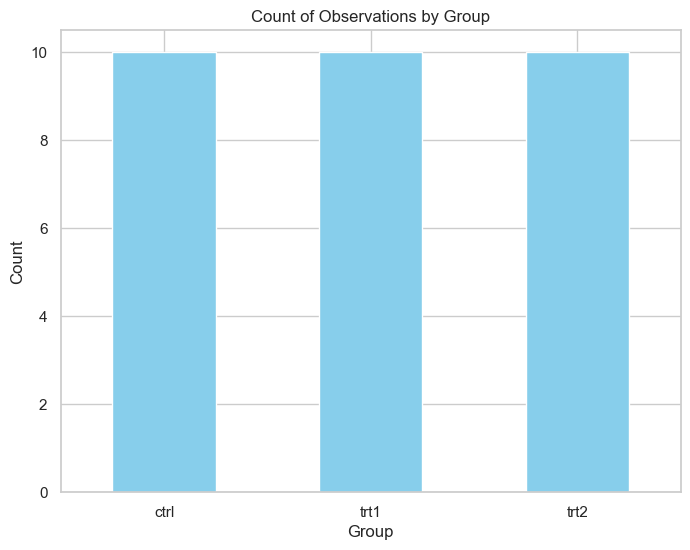

In [47]:
import matplotlib.pyplot as plt

# Observation count in each group
count_by_group = df_plant['group'].value_counts()

# Create the bar chart
plt.figure(figsize=(8, 6))
count_by_group.plot(kind='bar', color='skyblue')
plt.title('Count of Observations by Group')
plt.xlabel('Group')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.show()


We can observe through this graph that the dataset contains the same number of observations for all groups.

C:\Users\Ana Paula Damasceno\AppData\Local\Temp\ipykernel_14704\2611696652.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='group', y='weight', data=df_plant, ci='sd', capsize=0.1, palette='Blues')


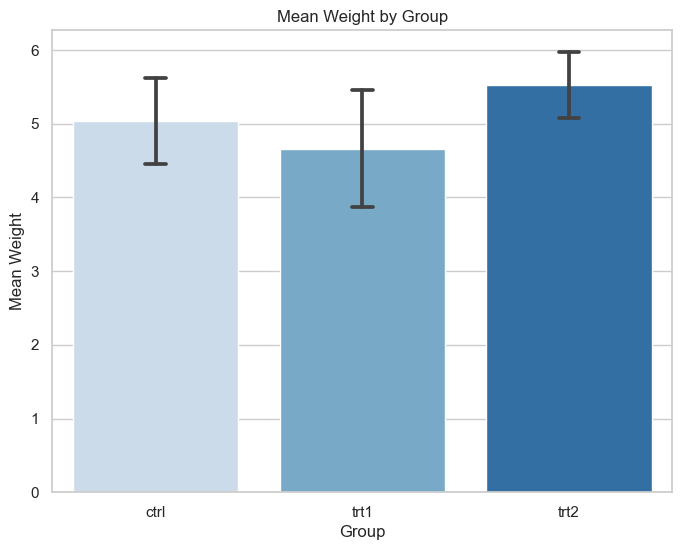

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar o gráfico de barras com intervalos de confiança
plt.figure(figsize=(8, 6))
sns.barplot(x='group', y='weight', data=df_plant, ci='sd', capsize=0.1, palette='Blues')
plt.title('Mean Weight by Group')
plt.xlabel('Group')
plt.ylabel('Mean Weight')
plt.show()

The bar chart with confidence intervals provides valuable insights into the effects of different treatments on plant weight. We observe that treatment 2 (trt2) results in a significantly higher mean plant weight compared to treatment 1 (trt1) and the control group (ctrl). This difference is visually highlighted by the higher mean bar for treatment 2.

Furthermore, it's important to note that the variability in plant weights in treatment 1 is higher than in the other groups, indicating a less consistent response to the treatment. On the other hand, the lower variability in treatment 2 suggests a more uniform and predictable response.

In summary, the bar chart offers a clear visual understanding of the differences in mean plant weights among the treatment groups, aiding in informing future decisions regarding cultivation strategies and treatment selection for optimizing plant growth.








# 4.4 - Outliers 

<Axes: xlabel='weight'>

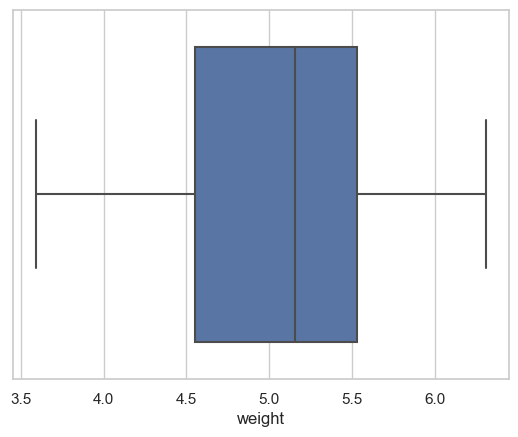

In [49]:
sns.boxplot(x=df_plant["weight"])

# 4.5 - Hypothesis Testing

Contextualizing the hypothesis test: The hypothesis test to be conducted aims to determine if there is a statistically significant difference between the means of the three groups: the control group and the two treatment groups. We will use a significance level (alpha) of 0.05. If the test results indicate evidence of a difference between the means, further analysis will be conducted to identify where this difference lies.

To compare the means of the groups, we will use the ANOVA hypothesis test.

ANOVA: The Analysis of Variance (ANOVA) hypothesis test is a statistical technique used to determine if there are significant differences between the means of three or more groups. It compares the variability within each group with the variability between the groups. The null hypothesis assumes that there are no significant differences between the means of the groups, while the alternative hypothesis suggests that at least one mean is significantly different from the others. If the resulting p-value from the ANOVA is less than a pre-determined significance level (such as 0.05), we reject the null hypothesis and conclude that there is at least one significantly different group mean.

In [230]:
import scipy.stats as stats

# Perform ANOVA
anova_result = stats.f_oneway(
    df_plant[df_plant['group'] == 'ctrl']['weight'],
    df_plant[df_plant['group'] == 'trt1']['weight'],
    df_plant[df_plant['group'] == 'trt2']['weight']
)

print(f"F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")

# Check if p-value is less than alpha (0.05)
alpha = 0.05
if anova_result.pvalue < alpha:
    print("There is evidence of a significant difference between the means of the three groups.")
else:
    print("There is no evidence of a significant difference between the means of the three groups.")


F-statistic: 4.846087862380136, p-value: 0.0159099583256229
There is evidence of a significant difference between the means of the three groups.


C:\Users\Ana Paula Damasceno\AppData\Local\Temp\ipykernel_5736\4080483842.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='group', y='weight', data=df_plant, ci='sd', capsize=0.1, palette='Blues')


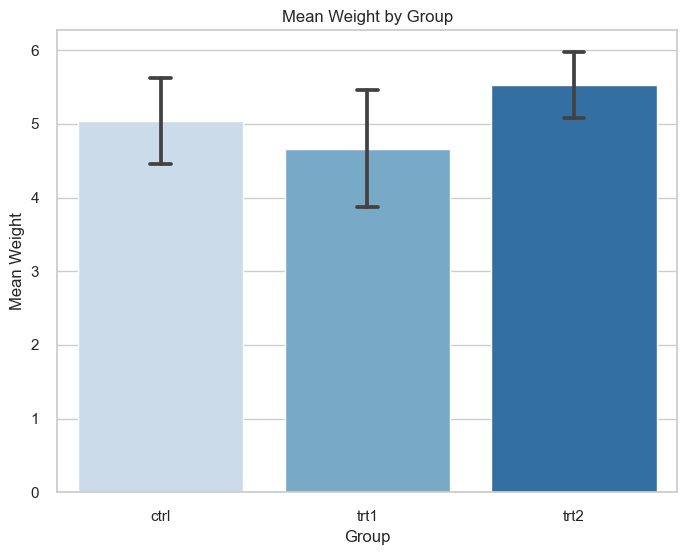

In [273]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create bar plot with confidence intervals
plt.figure(figsize=(8, 6))
sns.barplot(x='group', y='weight', data=df_plant, ci='sd', capsize=0.1, palette='Blues')
plt.title('Mean Weight by Group')
plt.xlabel('Group')
plt.ylabel('Mean Weight')
plt.show()


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3909 -1.0622 0.3202  False
  ctrl   trt2    0.494  0.198 -0.1972 1.1852  False
  trt1   trt2    0.865  0.012  0.1738 1.5562   True
---------------------------------------------------


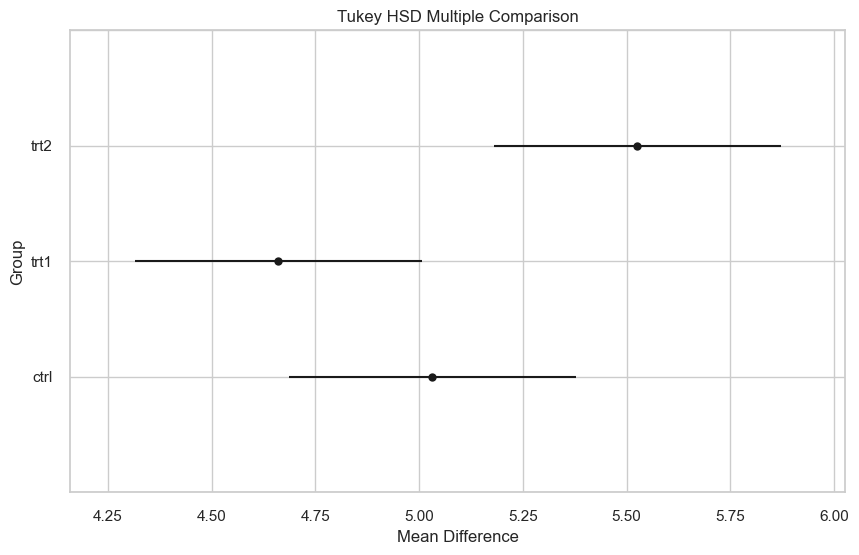

In [233]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey's HSD test
tukey_result = pairwise_tukeyhsd(df_plant['weight'], df_plant['group'], alpha=0.05)
print(tukey_result)

# Plot Tukey's HSD results
tukey_result.plot_simultaneous()
plt.title('Tukey HSD Multiple Comparison')
plt.xlabel('Mean Difference')
plt.ylabel('Group')
plt.show()


# Conclusion
Based on the statistical analysis performed, we can conclude that there is evidence of a significant difference between the mean weights of plants in the different treatment groups. The analysis of variance (ANOVA) indicated a significant difference between the means of the three groups (control, treatment 1, and treatment 2) with a p-value of approximately 0.0159, which is less than the significance level of 0.05.

To identify where these differences occur, we applied Tukey's HSD multiple comparison test. The results showed that there are no significant differences between the control group and the treatment groups. However, there was a significant difference between treatments 1 and 2, with treatment 2 having a significantly higher mean weight than treatment 1.

Therefore, we conclude that treatment 2 is more effective in increasing plant weight compared to treatment 1, while there is no evidence of significant differences between the control group and any of the treatments. 

# 5 - Task 4 - Trees


The task involves analyzing the trees dataset, which comprises measurements of diameter, height, and volume of timber in 31 felled black cherry trees. The diameter, labeled as "girth" in the dataset, is measured at 4 foot 6 inches above the ground.

a. Perform a correlation analysis between all numerical variables. Include and comment on 
the results of hypothesis tests for the population correlation coefficients between all three 
pairs of variables (you can use the pearsonr function from the scipy.stats library).

b. There is interest in estimating the volume of timber from trees using either the girth or the 
height of the trees, or both. Perform a regression analysis to decide which of the three 
possible models you would recommend using. Interpret your results and provide a short 
conclusion of your findings.

# 5.1 - Loading the file

In [236]:
from pydataset import data 
df_trees = data("trees")

# 5.2 - Characterisation of the data set

In [96]:
df_trees.head()

,Girth,Height,Volume
1,8.3,70,10.3
2,8.6,65,10.3
3,8.8,63,10.2
4,10.5,72,16.4
5,10.7,81,18.8


The dataset df.trees consists of data on tree diameter, height, and volume

In [265]:
df_trees.shape

(31, 4)

 The dataset contains 31 rows and 3 columns

In [98]:
df_trees.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 1 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Girth   31 non-null     float64
 1   Height  31 non-null     int64  
 2   Volume  31 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 992.0 bytes


The provided data comprises three variables: "Girth," "Height," and "Volume." "Girth" and "Volume" are of type float64, representing continuous measurements, while "Height" is of type int64, indicating discrete values

In [99]:
df_trees.describe ()

,Girth,Height,Volume
count,31.000000,31.000000,31.000000
mean,13.248387,76.000000,30.170968
std,3.138139,6.371813,16.437846
min,8.300000,63.000000,10.200000
25%,11.050000,72.000000,19.400000
50%,12.900000,76.000000,24.200000
75%,15.250000,80.000000,37.300000
max,20.600000,87.000000,77.000000


Girth (Circumference): The average circumference is approximately 13.25 inches, with a variation of about 3.14 inches around the mean (standard deviation). Circumference ranges from 8.3 to 20.6 inches, with 25% of values below 11.05 inches and 75% of values below 15.25 inches.

Height: The average height is 76 inches, with a standard deviation of approximately 6.37 inches. Height ranges from 63 to 87 inches, with 25% of values below 72 inches and 75% of values below 80 inches.

Volume: The average volume is about 30.17 cubic units, with a standard deviation of approximately 16.44 cubic units. Volume ranges from 10.2 to 77 cubic units, with 25% of values below 19.4 cubic units and 75% of values below 37.3 cubic units.








In [238]:
df_trees.isnull().sum()

Girth     0
Height    0
Volume    0
dtype: int64

# 5.3 - Data Exploration 

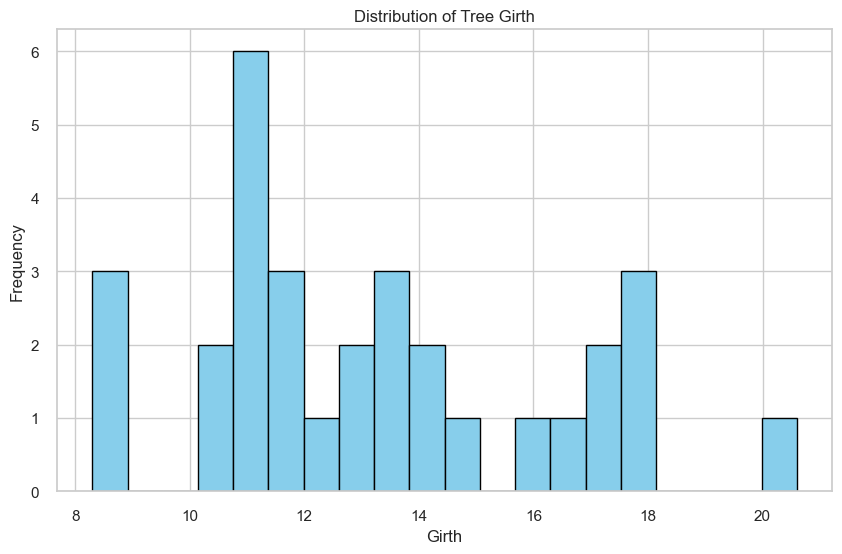

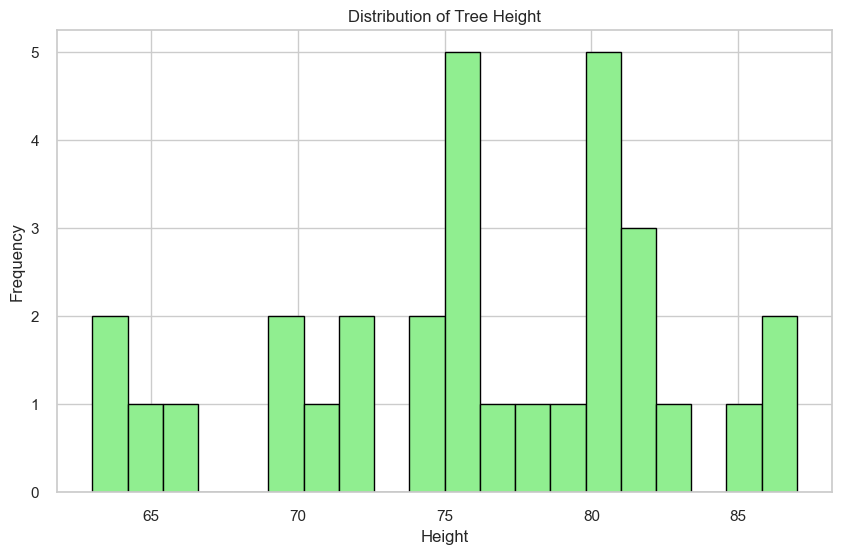

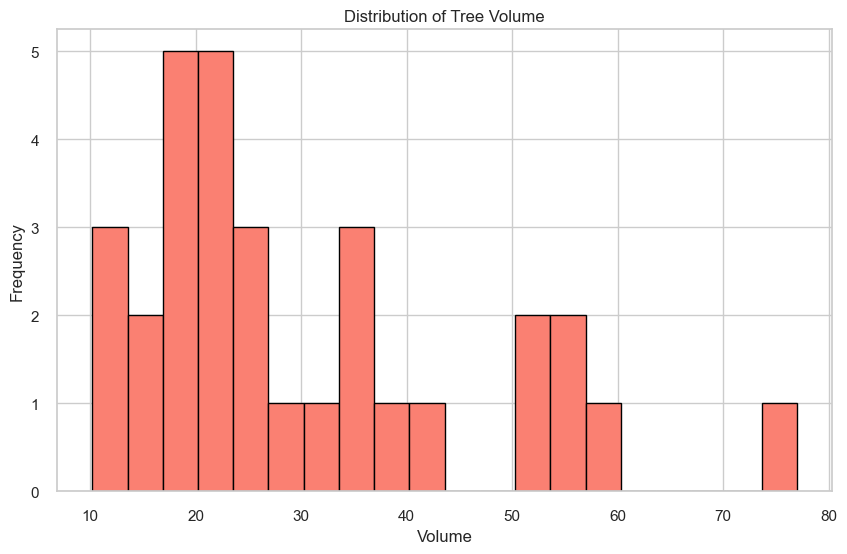

In [242]:
import matplotlib.pyplot as plt

# Visualization of the distribution of tree circumference
plt.figure(figsize=(10, 6))
plt.hist(df_trees['Girth'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Tree Girth')
plt.xlabel('Girth')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualization of the distribution of tree height
plt.figure(figsize=(10, 6))
plt.hist(df_trees['Height'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Tree Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualization of the distribution of tree volume
plt.figure(figsize=(10, 6))
plt.hist(df_trees['Volume'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Tree Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Correlation Matrix:
           Girth   Height    Volume
Girth   1.000000  0.51928  0.967119
Height  0.519280  1.00000  0.598250
Volume  0.967119  0.59825  1.000000


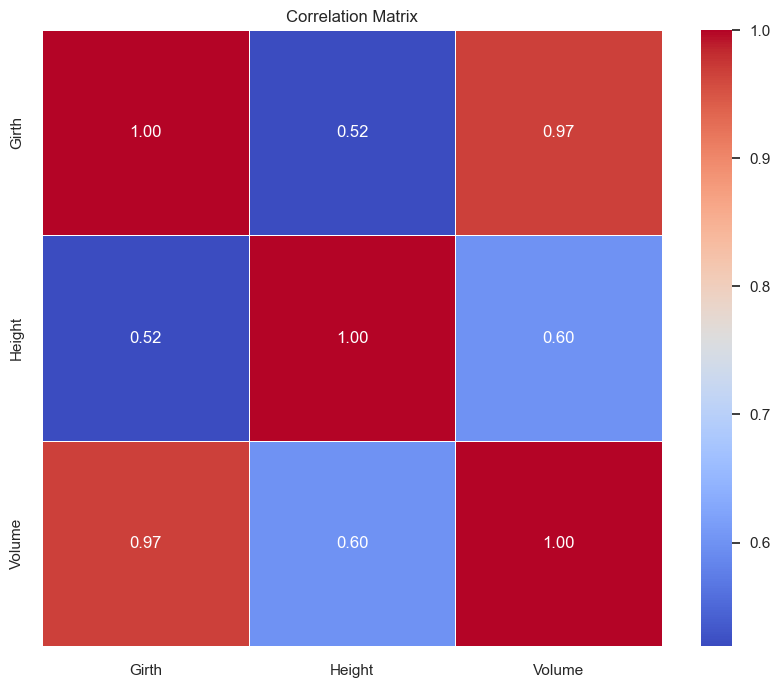

In [244]:
# Correlation analysis
correlation_matrix = df_trees.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The correlation coefficient between "Girth" and "Height" is approximately 0.52, indicating a moderate positive correlation. This suggests that there is a tendency for trees with larger girths to also have greater heights, although the relationship is not extremely strong.

The correlation coefficient between "Girth" and "Volume" is approximately 0.97, indicating a very strong positive correlation. This suggests that there is a nearly perfect linear relationship between the girth and volume of trees, meaning that as the girth increases, the volume also increases proportionally.

The correlation coefficient between "Height" and "Volume" is approximately 0.60, indicating a moderate positive correlation. This suggests that there is a tendency for taller trees to have larger volumes, but the relationship is not as strong as that between girth and volume.

# 5.4 Outliers

<Axes: xlabel='Girth'>

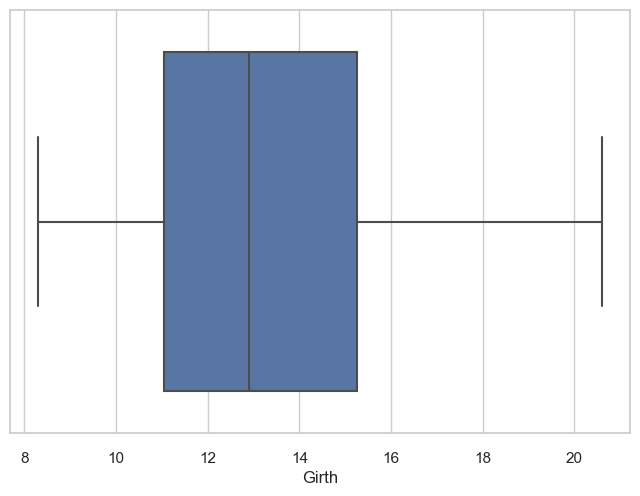

In [245]:
sns.boxplot(x=df_trees["Girth"])

<Axes: xlabel='Height'>

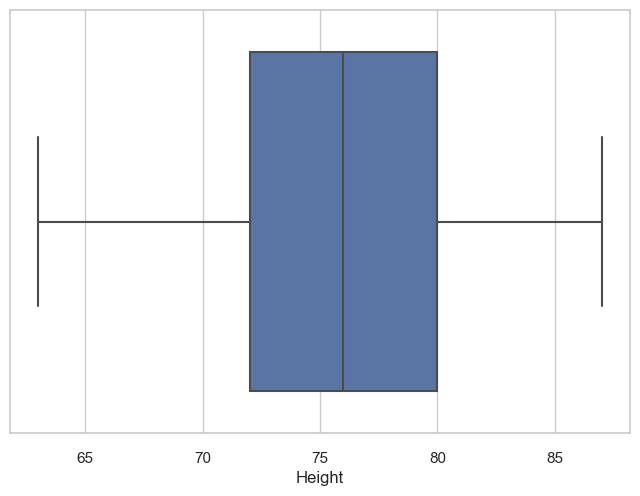

In [246]:
sns.boxplot(x=df_trees["Height"])

<Axes: xlabel='Volume'>

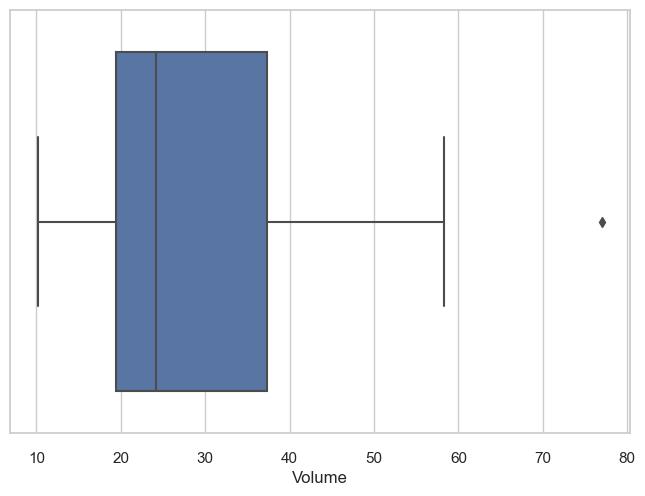

In [247]:
sns.boxplot(x=df_trees["Volume"])

Apenas a variavel volume apresentou outliers, iremos realizar a analise para verificar se ha necessidade de remocao

# 5.5 - Hypothesis Testing

In [252]:

from scipy.stats import pearsonr
# Hypothesis tests for population correlation coefficients
variables = ['Girth', 'Height', 'Volume']
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        corr, p_value = pearsonr(df_trees[variables[i]], df_trees[variables[j]])
        print(f"\nHypothesis Test for correlation between {variables[i]} and {variables[j]}:")
        print(f"Pearson Correlation Coefficient: {corr}")
        print(f"P-value: {p_value}")
        if p_value < 0.05:
            print("Result: Correlation is statistically significant.")
        else:
            print("Result: Correlation is not statistically significant.")




Hypothesis Test for correlation between Girth and Height:
Pearson Correlation Coefficient: 0.5192800719499373
P-value: 0.0027578147930576663
Result: Correlation is statistically significant.

Hypothesis Test for correlation between Girth and Volume:
Pearson Correlation Coefficient: 0.9671193682556305
P-value: 8.6443342117705775e-19
Result: Correlation is statistically significant.

Hypothesis Test for correlation between Height and Volume:
Pearson Correlation Coefficient: 0.5982496519917821
P-value: 0.0003783823479184885
Result: Correlation is statistically significant.


Correlation Hypothesis between Girth and Height:

Pearson Correlation Coefficient: 0.5192800719499373

P-value: 0.0027578147930576663

Result: The correlation is statistically significant.



The Pearson correlation coefficient between girth and height is approximately 0.52, indicating a moderate positive correlation. The P-value is less than 0.05, which leads us to reject the null hypothesis of no correlation between these variables. Therefore, we can conclude that there is a statistically significant correlation between the girth and height of the trees.

Correlation Hypothesis between Girth and Volume:

Pearson Correlation Coefficient: 0.9671193682556305

P-value: 8.6443342117705775e-19

Result: The correlation is statistically significant.



The Pearson correlation coefficient between girth and volume is approximately 0.97, indicating a very strong positive correlation. The P-value is extremely small, much less than 0.05, allowing us to reject the null hypothesis with high confidence. This means that there is a statistically significant and very strong correlation between the girth and volume of the trees.

Correlation Hypothesis between Height and Volume:

Pearson Correlation Coefficient: 0.5982496519917821

P-value: 0.0003783823479184885

Result: The correlation is statistically significant.



The Pearson correlation coefficient between height and volume is approximately 0.60, indicating a moderate to strong positive correlation. The P-value is less than 0.05, allowing us to reject the null hypothesis of no correlation between these variables. Thus, we can conclude that there is a statistically significant correlation between the height and volume of the trees.

Conclusion:
The results of the hypothesis tests show that all correlations between girth, height, and volume of the trees are statistically significant. The strongest relationship observed is between girth and volume, followed by the correlation between height and volume, and finally the correlation between girth and height. These results indicate that both girth and height have a significant relationship with the volume of the trees, with girth being the strongest indicator of volume.








# 5.6 - Regression analysis

In [254]:
# Regression analysis
X_girth = df_trees[['Girth']]
X_height = df_trees[['Height']]
X_both = df_trees[['Girth', 'Height']]
y = df_trees['Volume']

In [256]:
from sklearn.linear_model import LinearRegression

# Fit linear regression models
reg_girth = LinearRegression().fit(X_girth, y)
reg_height = LinearRegression().fit(X_height, y)
reg_both = LinearRegression().fit(X_both, y)

In [258]:
from sklearn.metrics import r2_score

# Evaluate goodness of fit
r2_girth = r2_score(y, reg_girth.predict(X_girth))
r2_height = r2_score(y, reg_height.predict(X_height))
r2_both = r2_score(y, reg_both.predict(X_both))

In [259]:
print("\nRegression Results:")
print(f"Model using Girth only - R-squared: {r2_girth}")
print(f"Model using Height only - R-squared: {r2_height}")
print(f"Model using both Girth and Height - R-squared: {r2_both}")


Regression Results:
Model using Girth only - R-squared: 0.9353198724551699
Model using Height only - R-squared: 0.3579026461082886
Model using both Girth and Height - R-squared: 0.9479500377816745


Model using Girth only: R-squared: 0.9353198724551699


An R-squared value of 0.9353 means that approximately 93.53% of the variability in tree volume is accounted for by girth alone. This high R-squared value indicates that girth is a very powerful predictor of tree volume.

Model using Height only: R-squared: 0.3579026461082886


An R-squared value of 0.3579 indicates that only around 35.79% of the variability in tree volume is explained by height alone. This relatively low R-squared value suggests that height is not as effective a predictor of tree volume as girth is.

Model using both Girth and Height: R-squared: 0.9479500377816745


An R-squared value of 0.9480 shows that roughly 94.80% of the variability in tree volume is explained when both girth and height are included in the model. This slightly higher R-squared value compared to the girth-only model indicates that adding height as a predictor offers some additional explanatory power, but girth remains the primary factor.

Conclusion
The regression analysis demonstrates that girth is a much more significant predictor of tree volume than height. Although height does add some explanatory power when combined with girth, the improvement is minimal. Therefore, the model that includes both girth and height is the most comprehensive of the three, but girth alone explains the majority of the variance in tree volume. For practical purposes, using girth alone is almost as effective as using both predictors, and may be preferred for its simplicity.